In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')



### **Context**

TLC (Taxi and Limousine Commission) New York adalah badan pemerintah yang bertanggung jawab atas regulasi dan pengawasan layanan taksi, limusin, dan kendaraan sewaan lainnya di New York City. TLC bertanggung jawab memberi izin kepada pengemudi taksi, kendaraan yang digunakan, hingga menentukan standar tarif untuk taksi-taksi yang beroperasi di daerah new york.


TLC memiliki target untuk meningkatkan jumlah kendaraan yang dapat diakses oleh individu dengan disabilitas seperti pengguna kursi roda hingga 50%. Kendaraan terkait berupa Nissan NV200 atau 'The Taxi of Tomorrow' yaitu armada yang telah diakui oleh TLC sudah sesuai untuk memfasilitasi penumpang pengguna kursi roda. 

Dengan target baru ini, kita ingin mencari tahu kesiapan layanan taksi di new york city secara menyeluruh hingga dapat mengambil langkah lebih lanjut dan memprioritaskan para penumpang kursi roda.


**Stakeholder :**
- Pengatur Regulasi (Regulatory Authorities) dari pihak Taxi and Limousine Commission (TLC) di New York: Pihak yang mengatur tarif taksi, yang bertanggung jawab untuk menetapkan dan mengawasi tarif taksi

Pertanyaan utama : Apakah layanan taksi di new york city sudah baik? 

Masalah : 

**Apakah taksi menjadi pilihan masyarakat?**
1. Mencari tahu apakah tarif yang diberikan kepada pelanggan sudah sesuai atau memuaskan. 
2. Apakah penggunaan itu meningkat atau tidak?
3. Apakah taksi menjadi pilihan bagi penumpang group-ride? 
4. Apakah taksi menjadi pilihan untuk pelanggan yang ingin berpergian jauh?
5. Kepuasan pelanggan dalam penggunaan layanan taksi

**Apakah layanan taksi sudah sesuai regulasi?**
1. Apakah MTA Tax dan improvement surcharge yang dikenakan sudah sesuai regulasi?
2. Apakah peraturan terkait tarif telah diaplikasikan secara teratur?
3. Apakah peraturan tarif sudah cukup memadai?
4. Sudah sesuaikah pengenaan congestion_surcharge?

**Apakah sistem layanan taksi sudah optimal?**

1. Melihat vendor yang lebih cepat dalam menanggulangi data perjalanan
2. Apakah integrasi pemesanan taksi ke sistem teknologi itu dimanfaatkan pelanggan?

## **I. Data Understanding**

No |Nama Kolom | Penjelasan |
|---|---------|-----------------------------------------------------------------------------------------|
|1. |Vendor ID | Id perusahaan yang menyediakan rekaman data
|2. |LPEP_pickup_datetime | Waktu dan tanggal agrometer mulai menghitung atau waktu pickup pelanggan
|3. | LPEP_dropoff_datetime | Waktu dan tanggal agrometer terakhir menghitung atau waktu dropoff pelanggan
|4. |Passenger-count | Jumlah pelanggan yang naik taksi tersebut
|5. |Trip_distance | Jarak yang ditempuh
|6. |PULocationID | Zona pickup
|7. |DOLocationID | Zona dropoff
|8. |RateCodeID |Kode yang menandakan kategori tarif yang dikenakan pelanggan (1 yaitu Standard Rate, 2 yaitu JFK, jika perjalanannya berasal dari / berakhir di JFK airport, akan diberi flat rate atau tarif yang sudah ditetapkan (tidak menggunakan agrometer), 3 yaitu Newark, jika perjalanannya berasal dari / berakhir di Newark airport, akan diberi flat rate, 4 yaitu Nassau or Westchester, melampaui daerah new york city sehingga tarif akan lebih tinggi, 5 yaitu Negotiated fare, dimana pelanggan menegosiasi untuk mendapatkan tarif tertentu terkait lokasi tujuan spesifik yang diluar zona misalnya kota kecil yang tidak umum dilalui taksi, 6 yaitu group ride, dimana beberapa orang dengan destinasi yang sama melakukan pembagian tarif.)   
|9. |Store_and_fwd_flag | Yes = data terkait perjalanan tertentu tersimpan di sistem sementara, No = data terkait perjalanan tertentu tidak tersimpan karena langsung sampai ke sistem pusat
|10. |payment_type | Tipe pembayaran (cash, atau credit card, atau tidak terkena pembayaran, atau tidak diketahui, atau dispute)
|11. |Fare_amount | Tarif  
|12. |Extra | Biaya yang akan ditambah \$ 0.5  jika perjalanan dilakukan pada rush hour dan $1 jika pickup pada overnight yaitu umumnya jam 8 malam hingga 6 pagi,(seharusnya tidak lebih dari \$ 1.5).
|13. |MTA_tax | Pajak yang dikenakan untuk daerah new york yaitu \$ 0.5 (biaya tidak boleh lebih).
|14. |Improvement surcharge | Biaya \$ 0.30 per trip yang digunakan untuk meningkatkan kualitas sistem teknologi yang ada di taksi dan sebagainya. Update per 2022 biaya ini menjadi \$ 1.00 per trip (biaya tidak boleh lebih).
|15. |Tip_amount | Jumlah tips yang diberi 
|16. |Tolls_amount | Jumlah bayar tol
|17. |Total_amount | Jumlah yang dibayarkan tidak termasuk tips
|18. |Trip_type | Melihat apakah pelanggan melakukan pemesanan taksi sebelumnya atau tidak
|19. |Congestion_surcharge | Biaya yang dikenakan untuk daerah manhattan atau CBD (Central Business District) yang berupa fixed fee (\$ 2.5  Weekday, \$ 2.75  Weekend).

### Dataset read and information

In [3]:
# Membaca file csv
df = pd.read_csv('NYC TLC Trip Record.csv')

In [4]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

Terdapat 14 kolom tipe float, 3 kolom tipe integer, dan  3 kolom tipe objek. 

Secara sekilas, data yang kosong ada pada kolom :
- 'ehail_fee' yaitu null secara keseluruhan baris
- 'store_and_fwd_flag
- 'RateCodeID' 
- 'passenger_count'
- 'payment_type'
- 'trip_type'
- 'congestion_surcharge'

In [5]:
# first 5 rows of the dataset 
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


Data ini terdiri dari rekaman setiap perjalanan,dimana setiap barisnya berisi:
- Waktu pickup dan dropoff setiap trip taksi (dalam format tanggal dan waktu),
- Penyimpanan sementara atau tidaknya data sebuah trip,
- Kode perjalanan,
- ID lokasi pickup dan dropoff ,
- Jumlah penumpang per armada tersebut, 
- Jarak yang ditempuh,
- Tarif yang dikenakan,
- Biaya-biaya tambahan,
- Pajak MTA,
- Jumlah tip,
- Biaya untuk peningkatan layanan taksi,
- Total harga yang dikenakan,
- Jenis pembayaran,
- Jenis perjalanan (pesan online atau tidak)
- Biaya yang dikenakan pada taksi daerah manhattan

### I. Unique and Null Values

In [6]:
# Mencari unique values, proporsi dan jumlah null values, serta contoh valuesnya pada setiap kolom
list = []
for i in df.columns :
    list.append([i, round(df[i].isna().sum()/len(df[i].isna())*100,2), df[i].nunique(),df[i].unique()])

pd.DataFrame(list, columns = ['Column name', 'Null values (%)', 'Number of unique', 'Several unique values'])

,Column name,Null values (%),Number of unique,Several unique values
0,VendorID,0.00,2,"[2, 1]"
1,lpep_pickup_datetime,0.00,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,0.00,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,6.34,2,"[N, Y, nan]"
4,RatecodeID,6.34,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,0.00,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,0.00,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,6.34,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,0.00,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,0.00,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Dari tabel di atas dapat disimpulkan bahwa terdapat kolom-kolom data seperti berikut:

Jenis kolom :

**Kolom Nominal**, kolom yang merepresentasikan kategori atau label :
1. RateCode ID 
2. Vendor ID
3. PULocation ID
4. DOLocation ID

**Kolom kategorikal kualitatif**, kolom kualitas kategoris :
1. store_and_fwd_flag

**Kolom kuantitatif**, yaitu kolom continuous atau discrete :
1. Passenger_count (discrete)
2. Sisanya (continuous)




Data Kosong:

**Kolom dengan null values 100%**:
1. ehail_fee, sehingga drop saja kolom tersebut

**Kolom dengan sedikit null values dengan:** 
- Persentase yang sama (6.34 %), terdapat kemungkinan 5 kolom ini selalu kosong secara bersamaan
    1. store_and_fwd_flag  
    2. RatecodeID
    3. passenger_count
    4. payment_type
    5. congestion_surcharge
- Persentase yang berbeda 
    1. trip_type (6.35 %)



Anomali Data

Terdapat beberapa anomali dalam data yaitu: 

**Rate code ID:** 
1. 99.0 (yang tidak terdefinisi sebagai code apa)

**Kolom-kolom numerik:** 
1. Memiliki nilai minus contohnya mta_tax -0.5



In [7]:
# Melakukan pengecekan salah satu kolom dengan null_values 6.34% yaitu store_and_fwd_flag  
df[df['store_and_fwd_flag'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


Jumlah baris dengan kolom 'store_and_fwd_flag' adalah 4324. Sehingga perlu dicek apakah kolom-kolom (RatecodeID, passenger_count, payment_type, congestion_surcharge) dengan persentase null values yang sama, secara bersamaan null. 

In [8]:
# Melihat null values terjadi secara bersamaan pada kolom-kolom dengan null 6.34%
df[(df['store_and_fwd_flag'].isna())&(df['RatecodeID'].isna())&(df['passenger_count'].isna())&(df['payment_type'].isna())&(df['congestion_surcharge'].isna())]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


Dengan kondisi memunculkan hanya baris-baris dengan kolom null values 6.34% saja, jumlah baris masih sama dengan sebelumnya yaitu 4324 baris sehingga kolom-kolom ini akan dihilangkan di data cleaning

### II. Duplicated values and upnormal values search

In [9]:
# check duplicated values
df[df.duplicated()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


Tidak terdapat duplikasi baris berdasarkan semua kolom yang ada.

In [10]:
# Fungsi untuk melakukan pengecekan nilai minus yang terduplikasi dan tidak 
def duplicatpay(namakolom):
    listdup = 0
    listidakdup = 0 
    valuetidakdup = []
    valuedup= []
    for i in df['lpep_pickup_datetime'][df[namakolom]<0] : 
        if len(df[df['lpep_pickup_datetime']==i]) >= 2 :
            listdup +=1
            valuedup.append(i)
        elif len(df[df['lpep_pickup_datetime']==i]) <2: 
            listidakdup +=1
            valuetidakdup.append(i)
    return listdup, valuedup, listidakdup, valuetidakdup

In [11]:
# Melihat kolom-kolom nominal yang bernilai < 0 / minus 
pay = ['fare_amount','mta_tax', 'extra','improvement_surcharge','total_amount','tip_amount','tolls_amount','congestion_surcharge']
paylis = []
for i in pay:
    dup,notdup, dupsam, notdupsam= duplicatpay(i)
    paylis.append([i,len(df[df[i]<0]),dup, notdup, dupsam, notdupsam])
#notdup,dupsam,notdupsam

pd.DataFrame(paylis, columns = ['Columns with payment','Number of minus', 'Duplicated','Duplicated Sample (Pickupdatetime)','Not Duplicated','Not duplicated sample (Pickupdatetime)'])


,Columns with payment,Number of minus,Duplicated,Duplicated Sample (Pickupdatetime),Not Duplicated,Not duplicated sample (Pickupdatetime)
0,fare_amount,176,173,"[2023-01-01 14:58:13, 2023-01-01 17:24:52, 202...",3,"[2023-01-05 10:51:00, 2023-01-10 10:00:00, 202..."
1,mta_tax,165,165,"[2023-01-01 14:58:13, 2023-01-01 17:24:52, 202...",0,[]
2,extra,80,80,"[2023-01-02 02:05:08, 2023-01-04 16:13:03, 202...",0,[]
3,improvement_surcharge,174,174,"[2023-01-01 14:58:13, 2023-01-01 17:24:52, 202...",0,[]
4,total_amount,179,176,"[2023-01-01 14:58:13, 2023-01-01 17:24:52, 202...",3,"[2023-01-05 10:51:00, 2023-01-10 10:00:00, 202..."
5,tip_amount,9,9,"[2023-01-03 11:43:10, 2023-01-05 12:33:18, 202...",0,[]
6,tolls_amount,0,0,[],0,[]
7,congestion_surcharge,3,3,"[2023-01-17 18:57:59, 2023-01-19 08:25:38, 202...",0,[]


In [12]:
# Melihat salah satu sample baris yang terduplikasi (contoh yaitu dari sample mta_tax)
df[df['lpep_pickup_datetime']=='2023-01-01 14:58:13']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,3.0,1.0,0.0


In [13]:
# Melihat salah satu sample baris yang tidak terduplikasi (contoh yaitu dari sample fare_amount)
df[df['lpep_pickup_datetime']=='2023-01-05 10:51:00']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,NaN,NaN,116,151,NaN,2.22,-43.54,0.0,0.0,0.76,0.0,NaN,1.0,-41.78,NaN,NaN,NaN


1. Terdapat 6 kolom nominal ('mta_tax','extra','improvement_surcharge','tip_amount','congestion_surcharge') yang selalu memiliki duplikasi dimana yang membedakan adalah kolom nominal (baris 1 kolom nominal (-), baris 2 kolom nominal (+)).
    - Kolom-Kolom ini tidak selalu mengalami jumlah duplikasi yang sama sebab terdapat beberapa kolom seperti 'extra' yang tidak selalu kena biaya (bernilai 0.00)
    


2. Sisa 2 kolom lainnya('fare_amount', 'total_amount') memiliki non duplikat sebanyak 3 baris dimana keduanya berhubungan (sample datetime untuk kedua kolomnya sama). 


## **II. Data Cleaning**

### I. Dropping Column

In [14]:
# Menghapus kolom ehail fee karena seluruhnya null
df.drop(['ehail_fee'], axis = 1, inplace = True)

### II. Dropping Minus Rows

In [15]:
# Menghapus setiap baris yang memiliki nilai minus pada kolom total_amount
for i  in df[df['total_amount']<0].duplicated(subset=['lpep_pickup_datetime','lpep_dropoff_datetime'],keep = False).index:
    df.drop(i,axis= 0, inplace = True)

Kondisi yang dimasukkan hanya 'total_amount'<0 dimana jumlah barisnya nominal minusnya terbanyak (179 baris) sebab total_amount selalu harus terisi dan tidak mungkin tidak terkena cas seperti kolom lainnya. 

### III. Dropping Rows with Null values

In [16]:
# Melakukan penghapusan baris yang berisi null values berdasarkan 4 kolom dibawah karena letak null values yang berhubungan
df.dropna(subset =['store_and_fwd_flag','RatecodeID','passenger_count','payment_type'], axis = 0, inplace = True)

### IV. Dropping Rows based on null values on 'trip_type' column

In [17]:
# Melihat baris-baris berdasarkan null values yang ada pada kolom trip_type(kolom dengan persentase null yang berbeda)
display(df[df['trip_type'].isna()])
len(df[df['trip_type'].isna()])

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0


10

Terdapat 10 baris yang memiliki null values pada trip_type dimana RatecodeIDnya adalah 99.0 (tidak mewakili rate code apapun pada dictionary), sehingga 10 baris ini akan dihapus.

In [18]:
# Menghapus 10 baris terkait
df.dropna(subset = ['trip_type'],axis = 0, inplace = True)

### V. Changing data type to datetime and adding new columns related to datetime

In [19]:
# Mengubah data datetime pickup dan dropoff menjadi datetime datatype
df['lpep_pickup_datetime']= pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime']= pd.to_datetime(df['lpep_dropoff_datetime'])

In [20]:
# Mengekstrak tahun dari datetime pickup dan dropoff menjadi kolom baru
df['lpep_pickup_year']= df['lpep_pickup_datetime'].dt.year
df['lpep_dropoff_year']= df['lpep_dropoff_datetime'].dt.year


In [21]:
# Mengekstrak tanggal dari datetime pickup dan dropoff menjadi kolom baru
df['Pickup_date']= df['lpep_pickup_datetime'].dt.strftime("%d")
df['Dropoff_date']= df['lpep_dropoff_datetime'].dt.strftime("%d")

In [22]:
# Mengekstrak nama hari dari datetime pickup dan dropoff menjadi kolom baru
df['Pickup_day']= df['lpep_pickup_datetime'].dt.day_name()
df['Dropoff_day']= df['lpep_dropoff_datetime'].dt.day_name()


In [23]:
# Mengekstrak jam dari datetime pickup dan dropoff menjadi kolom baru
df['lpep_pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['lpep_dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour

In [24]:
# Mengekstrak waktu dari datetime pickup dan dropoff menjadi kolom baru
df['lpep_pickup_time'] = df['lpep_pickup_datetime'].dt.time
df['lpep_dropoff_time'] = df['lpep_dropoff_datetime'].dt.time

In [25]:
# Mencari lama durasi dari setiap perjalanan dan menambahkan menjadi kolom baru
df['Duration of trip (seconds)']=(df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']).dt.total_seconds()


In [26]:
# Mengelompokkan jam pickup datetime to time of day (new column)
def timeday(df) :
    if (df['lpep_pickup_hour'] > 6) and (df['lpep_pickup_hour'] < 12) :
        return 'Morning'
    elif(df['lpep_pickup_hour'] >= 12) and (df['lpep_pickup_hour'] < 18) :
        return 'Afternoon' 
    elif(df['lpep_pickup_hour'] >= 18) and (df['lpep_pickup_hour'] < 20) :
        return 'Evening' 
    else :
        return 'Overnight'
df['Time of the day'] = df.apply(timeday,axis=1)

### VI. Finding data below year 2023

In [27]:
# Menemukan baris-baris dengan tahun dibawah 2023
df[df['lpep_pickup_year']<2023]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Pickup_date,Dropoff_date,Pickup_day,Dropoff_day,lpep_pickup_hour,lpep_dropoff_hour,lpep_pickup_time,lpep_dropoff_time,Duration of trip (seconds),Time of the day
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1.0,5.37,16.0,...,09,09,Friday,Friday,14,14,14:10:49,14:22:26,697.0,Afternoon
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1.0,5.48,25.5,...,09,09,Friday,Friday,14,15,14:55:42,15:33:06,2244.0,Afternoon
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1.0,65,178,1.0,7.72,34.5,...,01,02,Thursday,Friday,20,11,20:21:27,11:07:31,53164.0,Overnight


Terdapat 3 baris data dengan tahun perjalanan 2022 dan 2009. Sebab jumlah data terkait 2 tahun ini sangat sedikit, akan dihapus 3 baris tersebut

In [28]:
# Menghapus baris berdasarkan indeks
df.drop(index = [17874,298,318],axis = 0,inplace = True)

### VII. Adding tip or not indicator column

In [29]:
# Membuat kolom indikator pemberian tips (1) atau tidak (0)
list=[]
for i in df['tip_amount'] :
    if i <=0 :
        list.append(0)
    if i>0 :
        list.append(1)
df['tip or not'] = list

### VIII. Adding Related Location ID Zone

In [30]:
# Menambahkan kolom baru yang terdiri dari daerah, zona, dan zona layanan dari setiap pickup Location ID
zona = pd.read_csv('taxi+_zone_lookup.csv').set_index('LocationID')
dfz =df.join(zona, on='PULocationID')
dfz=dfz.rename(columns ={'Borough':'PUBorough','Zone':'PUZone','service_zone':'PU_service_zone'})

In [31]:
# Menambahkan kolom baru yang terdiri dari daerah, zona, dan zona layanan dari setiap dropoff Location ID
dfzona =dfz.join(zona, on='DOLocationID')
dfzona = dfzona.rename(columns ={'Borough':'DOBorough','Zone':'DOZone','service_zone':'DO_service_zone'})
dfzona.to_csv(r'C:\Users\sylvi\Documents\JCDS 2104\Modul 2\data+zona.csv')

### IX. Conclusion of data cleaning

1.	Menghapus kolom ehail fee
2.	Menghapus nilai minus berdasarkan total_amount <0
3.	Menghapus nilai null berdasarkan 4 kolom yaitu  ‘store_and_fwd_flag’,’RatecodeID’,’ passenger_count’,’payment_type’.
4.	Menghapus baris-baris dengan RatecodeID 99.0 yang disertai null values pada trip_type
5.	Mengubah tipe data waktu pickup dan dropoff menjadi datetime
6.	Mengambil tahun, tanggal, nama hari, jam, waktu, durasi dari datetime pickup dan dropoff menjadi kolom-kolom baru
7.	Kategorisasi jam menjadi ‘Morning’,’Afternoon’,’Evening’,’Overnight’
8.	Menghapus baris-baris yang terjadi pada tahun <2023
9.	Menambahkan kolom indikator memberi tip (1) atau tidak(0)

|No  |Kolom baru                    | Contoh nilai    |         Penjelasan          |
|:--:|:----------------------------:|:---------------:|:---------------------------:|
|1   |lpep_pickup_year              |     2023        | Tahun dari tanggal pickup   |
|2   |lpep_dropoff_year             |     2023        | Tahun dari tanggal dropoff  |
|3   |Pickup_date                   |      31         | Tanggal pickup              |
|4   |Dropoff_date                  |      31         | Tanggal dropoff             |
|5   |Pickup_day                    |     Sunday      | Hari pickup                 |
|6   |Dropoff_day                   |     Sunday      | Hari dropoff                |
|7   |lpep_pickup_hour              |      16         | Jam pickup                  |
|8   |lpep_dropoff_hour             |      16         | Jam dropoff                 |
|9   |lpep_pickup_time              |   16:00:12      | Jam dan menit pickup        |
|10  |lpep_dropoff_time             |   16:10:08      | Jam dan menit dropoff       |
|11  |Duration of trip (seconds)    |    596.0        | Durasi perjalanan dalam satuan detik |
|12  |Time of the day               |  Overnight      | Kategori waktu              |
|13  |Tip or not                    |      1          | Indikator penumpang memberi tip (1) atau tidak (1)|
|    | hanya pada variabel 'dfzona'|                                                  |
|14  |PU Borough                    | Manhattan       | Daerah pickup               |
|15  |PUZone                        | Morningside Heights| Zona pickup              |
|16  |PU_service_zone               | Boro Zone       | Zona layanan pickup         |
|14  |DO Borough                    | Manhattan       | Daerah dropoff              |
|15  |DOZone                        | Lincoln Square West| Zona dropoff             |                                    
|16  |DO_service_zone               | Yellow Zone     | Zona layanan dropoff        |

## **III. Data Analysis**

### I. Distribution

In [93]:
# Melihat distribusi secara garis besar dengan membandingkan median dan mean
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
VendorID,63699.0,1.855492,0.351607,1.0,2.0,2.00,2.00,2.00
RatecodeID,63699.0,1.101524,0.619581,1.0,1.0,1.00,1.00,5.00
PULocationID,63699.0,97.689430,60.140073,1.0,74.0,75.00,116.00,265.00
DOLocationID,63699.0,138.373664,76.884403,1.0,74.0,138.00,222.00,265.00
passenger_count,63699.0,1.315609,0.979370,0.0,1.0,1.00,1.00,9.00
trip_distance,63699.0,2.558402,2.671805,0.0,1.1,1.80,3.06,66.18
fare_amount,63699.0,16.134779,13.234070,0.0,9.3,12.80,19.10,490.00
extra,63699.0,0.885242,1.290234,0.0,0.0,0.00,1.00,12.50
mta_tax,63699.0,0.629967,0.362836,0.0,0.5,0.50,0.50,2.75
tip_amount,63699.0,2.043848,2.870847,0.0,0.0,1.46,3.22,100.00


Berdasarkan tabel di atas, hampir seluruh kolom mengalami distribusi tidak normal yaitu right skewed / positively skewed jika dilihat dari mean yang lebih besar dari median (50%) pada setiap kolomnya. 

Hanya terdapat kolom VendorID, lpep_pickup_hour,lpep_dropoff_hour, improvement_surcharge yang memiliki mean yang lebih kecil dari mediannya.

In [98]:
# Melihat distribusi berdasarkan beberapa data numerical yang non kategorical dengan boxplot
angka = ['trip_distance','fare_amount','tip_amount','total_amount','lpep_pickup_hour','lpep_dropoff_hour','Duration of trip (seconds)']

Distribution of trip_distance based on box plot and histogram


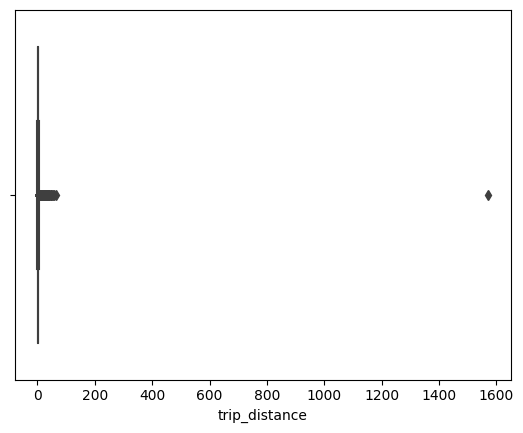

Distribution of fare_amount based on box plot and histogram


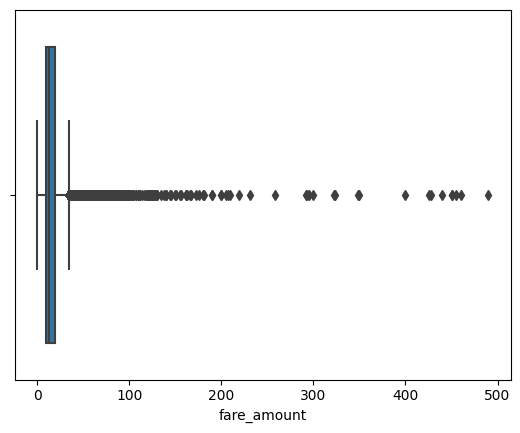

Distribution of tip_amount based on box plot and histogram


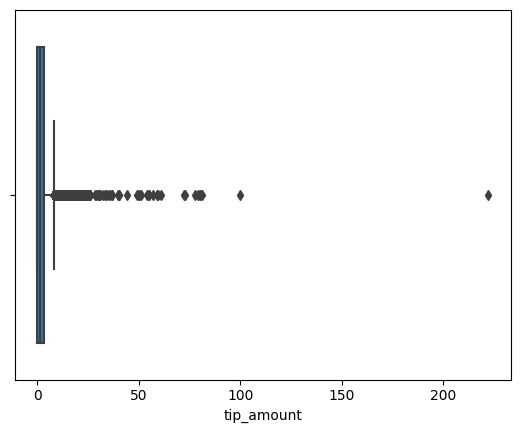

Distribution of total_amount based on box plot and histogram


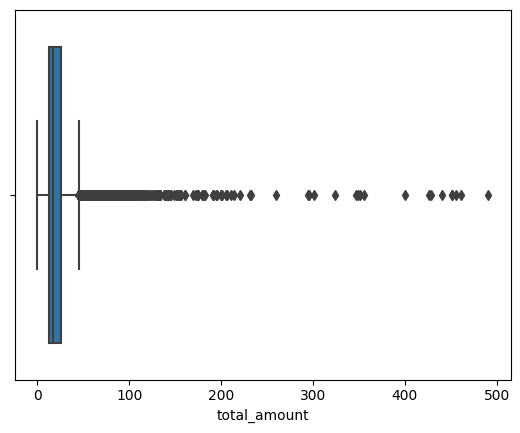

Distribution of lpep_pickup_hour based on box plot and histogram


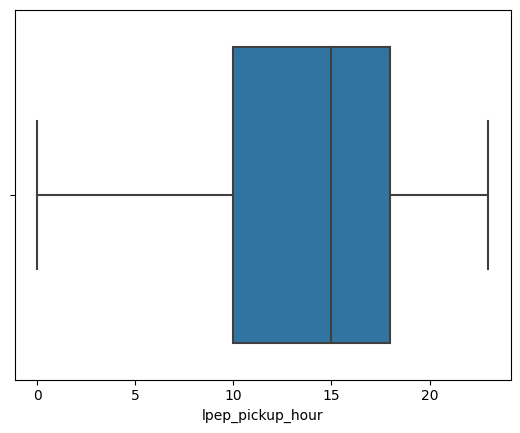

Distribution of lpep_dropoff_hour based on box plot and histogram


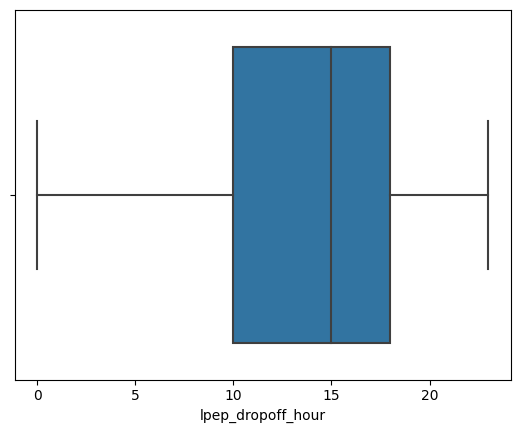

Distribution of Duration of trip (seconds) based on box plot and histogram


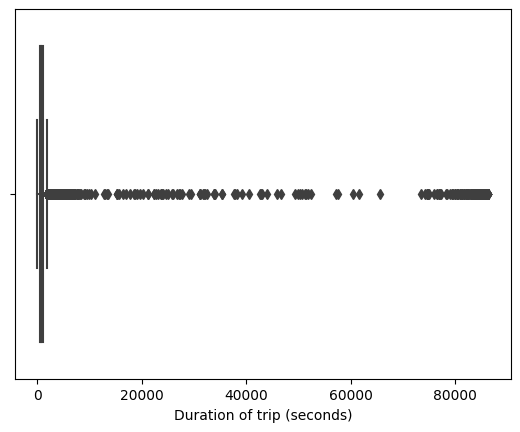

In [34]:
for i in angka:
    print(f'Distribution of {i} based on box plot and histogram')
    sns.boxplot(data = df, x = i)
    plt.show()

Berdasarkan boxplot, data disimpulkan tidak terdistribusi normal sebab boxplot menunjukkan konsentrasi data paling banyak berada di bagian kiri atau right skewed. Selain itu dapat dilihat : 
- Trip Distance dan tip_amount memiliki 1 data outlier yang berjarak sangat jauh dibanding outlier kedua 
- Fare_amount, total_amount, Duration of trip(seconds) memiliki sejumlah outlier di atas Q3+ 1.5 IQR
- Tidak terdapat kolom dengan outlier di bawah Q1 - 1.5 IQR sebab semua data nominal ataupun durasi tidak seharusnya minus
- Durasi perjalanan (Duration of trip(seconds)) terkecil adalah 0 detik


In [125]:
# Memastikan distribusi data dengan test normalitas 
from scipy.stats import kstest
angka = ['trip_distance','fare_amount','tip_amount','total_amount','lpep_pickup_hour','lpep_dropoff_hour','Duration of trip (seconds)']
list = []

for i in angka : 
    ks,pvalue = kstest(df[i],'norm')
    if pvalue> 0.05:
        list.append([i,"{:.3f}".format(pvalue), 'normal'])
    else :
        list.append([i,"{:.3f}".format(pvalue), 'not normal'])

pd.DataFrame(list, columns = ['Name of Column','P-Value','Distribution'])

,Name of Column,P-Value,Distribution
0,trip_distance,0.000,not normal
1,fare_amount,0.000,not normal
2,tip_amount,0.000,not normal
3,total_amount,0.000,not normal
4,lpep_pickup_hour,0.000,not normal
5,lpep_dropoff_hour,0.000,not normal
6,Duration of trip (seconds),0.000,not normal


Secara statistika, dapat dipastikan bahwa 7 kolom numerical tersebut memiliki distribusi tidak normal yang dilihat dari tes normalitas kolmogorov-smirnov. Seluruh kolom tersebut menghasilkan p-value dibawah 0.05 yang berarti TOLAK H0 dimana :
- H0 = distribusi normal
- H1 = distribusi tidak normal

### II. Outlier Data

In [36]:
# Memeriksa outlier pada kolom trip_distance
df[df['trip_distance'] ==df['trip_distance'].max()].T

,33373
VendorID,2
lpep_pickup_datetime,2023-01-17 18:40:38
lpep_dropoff_datetime,2023-01-17 19:04:45
store_and_fwd_flag,N
RatecodeID,5.0
PULocationID,82
DOLocationID,236
passenger_count,1.0
trip_distance,1571.97
fare_amount,29.97


In [37]:
# Melihat data-data dengan dropoff dan pickup location ID yang sama dengan outlier tersebut
df[(df['DOLocationID']==236)& (df['PULocationID']==82)].T

,313,1551,6770,33373
VendorID,2,2,2,2
lpep_pickup_datetime,2023-01-01 07:57:54,2023-01-02 10:58:35,2023-01-04 19:58:39,2023-01-17 18:40:38
lpep_dropoff_datetime,2023-01-01 08:15:47,2023-01-02 11:18:10,2023-01-04 20:19:49,2023-01-17 19:04:45
store_and_fwd_flag,N,N,N,N
RatecodeID,1.0,5.0,5.0,5.0
PULocationID,82,82,82,82
DOLocationID,236,236,236,236
passenger_count,1.0,1.0,1.0,1.0
trip_distance,7.77,8.22,8.08,1571.97
fare_amount,33.8,29.62,28.46,29.97


Sebab trip_distance seharusnya berhubungan dengan pickup dan drop off location ID maka outlier trip_distance akan diganti dengan mean trip_distance dari data-data dengan pickup dan drop off location ID yang sama.

In [38]:
# Mengganti outlier trip_distance dengan mean trip_distance yang memiliki DOLocationID dan PULocationID yang sama
df.replace(1571.97,df[(df['DOLocationID']==236)& (df['PULocationID']==82)]['trip_distance'][0:3].mean(), inplace = True)


In [39]:
# Memeriksa outlier pada kolom tip_amount
df[df['tip_amount'] == df['tip_amount'].max()].T

,50588
VendorID,2
lpep_pickup_datetime,2023-01-25 18:24:30
lpep_dropoff_datetime,2023-01-25 18:28:48
store_and_fwd_flag,N
RatecodeID,1.0
PULocationID,223
DOLocationID,223
passenger_count,1.0
trip_distance,0.76
fare_amount,6.5


Outlier pada tip_amount memiliki jarak dengan outlier kedua yang sangat berjauhan dan tidak dapat diganti dengan angka lainnya sehingga outlier ini akan dihapus.

In [40]:
# Melakukan drop outlier pada tip_amount
df.drop(50588, inplace = True)

### III. Anomali

In [153]:
# Mencari data dengan durasi perjalanan kurang dari sama dengan 0 detik
df[df['Duration of trip (seconds)']<=0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Dropoff_date,Pickup_day,Dropoff_day,lpep_pickup_hour,lpep_dropoff_hour,lpep_pickup_time,lpep_dropoff_time,Duration of trip (seconds),Time of the day,tip or not
1246,2,2023-01-01 22:14:04,2023-01-01 22:14:04,N,1.0000000000,226,264,1.0000000000,0.0000000000,3.0000000000,...,01,Sunday,Sunday,22,22,22:14:04,22:14:04,0.0000000000,Overnight,1
2015,1,2023-01-02 15:17:46,2023-01-02 15:17:46,Y,1.0000000000,3,264,2.0000000000,0.0000000000,24.0000000000,...,02,Monday,Monday,15,15,15:17:46,15:17:46,0.0000000000,Afternoon,0
2088,2,2023-01-02 15:02:08,2023-01-02 15:02:08,N,1.0000000000,264,264,1.0000000000,0.0000000000,3.0000000000,...,02,Monday,Monday,15,15,15:02:08,15:02:08,0.0000000000,Afternoon,0
2346,1,2023-01-02 18:38:48,2023-01-02 18:38:48,Y,1.0000000000,145,264,1.0000000000,0.0000000000,3.7000000000,...,02,Monday,Monday,18,18,18:38:48,18:38:48,0.0000000000,Evening,0
2707,2,2023-01-02 22:28:26,2023-01-02 22:28:26,N,5.0000000000,255,264,2.0000000000,0.0000000000,40.0000000000,...,02,Monday,Monday,22,22,22:28:26,22:28:26,0.0000000000,Overnight,0
2793,1,2023-01-03 03:50:19,2023-01-03 03:50:19,Y,5.0000000000,129,264,3.0000000000,0.0000000000,0.0000000000,...,03,Tuesday,Tuesday,3,3,03:50:19,03:50:19,0.0000000000,Overnight,0
3269,1,2023-01-03 10:16:41,2023-01-03 10:16:41,Y,1.0000000000,74,264,1.0000000000,0.0000000000,9.5000000000,...,03,Tuesday,Tuesday,10,10,10:16:41,10:16:41,0.0000000000,Morning,0
3592,1,2023-01-03 13:51:21,2023-01-03 13:51:21,Y,1.0000000000,18,264,1.0000000000,0.0000000000,41.7000000000,...,03,Tuesday,Tuesday,13,13,13:51:21,13:51:21,0.0000000000,Afternoon,0
3699,1,2023-01-03 14:46:21,2023-01-03 14:46:21,Y,1.0000000000,16,264,1.0000000000,0.0000000000,41.7000000000,...,03,Tuesday,Tuesday,14,14,14:46:21,14:46:21,0.0000000000,Afternoon,0
4064,1,2023-01-03 16:50:53,2023-01-03 16:50:53,Y,1.0000000000,97,264,1.0000000000,0.0000000000,7.9000000000,...,03,Tuesday,Tuesday,16,16,16:50:53,16:50:53,0.0000000000,Afternoon,0


Terdapat 59 baris data dengan durasi perjalanan 0 detik yang hampir seluruhnya memiliki DOlocationID yaitu 264. Jika DOlocationID bukan 264 maka DOlocationID dan PUlocationID akan sama contohnya index 7159 DOlocationID = 42 dan PUlocationID = 42.

In [156]:
# Mencari tahu lokasi dropoff terkait DOLocationID 264
dfzona[dfzona['DOLocationID']==264][['DOLocationID','DOBorough','DOZone','DO_service_zone']].head(1)

,DOLocationID,DOBorough,DOZone,DO_service_zone
115,264,Unknown,NV,NaN


LocationID yang paling sering muncul yaitu 264 tidak dikenali sebagai suatu daerah di NYC (Unknown) pada kolom DOBorough.

###  IV. Passenger and Trip - Oriented

#### 1. The "Fare is fair"

In [42]:
# Melihat jenis payment yang paling sering dipakai
percentag = round(df.groupby('payment_type')['VendorID'].count()/len(df)*100,2)
percentage = percentag.reset_index()
percentage.rename(columns = {'VendorID':'Each_Payment_Usage(%)'}, inplace = True)
percentage['payment_type']=['Credit Card','Cash','No charge','Dispute','Unknown']
percentage

,payment_type,Each_Payment_Usage(%)
0,Credit Card,63.85
1,Cash,35.52
2,No charge,0.52
3,Dispute,0.10
4,Unknown,0.00


[Text(0, 0, '40674'),
 Text(0, 0, '22627'),
 Text(0, 0, '333'),
 Text(0, 0, '63'),
 Text(0, 0, '2')]

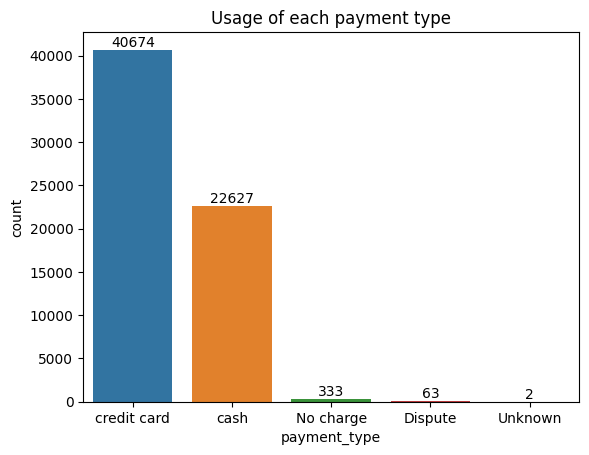

In [43]:
ax = sns.countplot(data= df, x ='payment_type')
plt.title('Usage of each payment type')
plt.xticks([0,1,2,3,4], ['credit card','cash','No charge','Dispute','Unknown'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

3 tipe pembayaran tertinggi adalah melalui credit card (63.85% atau 40674), cash (35.52% atau 22637), no charge(0.52% atau 333). Tipe pembayaran dispute hanya 0.1% atau sejumlah 63 trip dan tipe pembayaran unknown sebesar 0 % atau sejumlah 2 trip.

In [162]:
# Melihat biaya dikenakan untuk ke JFK yaitu ratecodeID 2 yang memiliki flat rate 70
dfzona[(dfzona['RatecodeID']==2)][['fare_amount','PUZone','DOZone']]

,fare_amount,PUZone,DOZone
247,70.0000000000,Old Astoria,Old Astoria
456,70.0000000000,Downtown Brooklyn/MetroTech,Downtown Brooklyn/MetroTech
476,70.0000000000,Central Harlem,JFK Airport
638,70.0000000000,Morningside Heights,JFK Airport
689,70.0000000000,East Harlem North,JFK Airport
...,...,...,...
62766,70.0000000000,Central Harlem,JFK Airport
62951,70.0000000000,Central Harlem,JFK Airport
63237,70.0000000000,Central Harlem North,JFK Airport
63278,70.0000000000,Central Park,JFK Airport


Biaya untuk tujuan JFK yaitu flat rate 70.00 sesuai regulasi oleh tlc(sumber 1.) cenderung sudah sesuai karena hampir seluruhnya bernilai \$ 70 walau masih ada rekaman yang menunjukkan ratecodeID 2 (JFK) dengan zona dropoff ataupun pickup yang bukan JFK Airport. Tidak memungkinkan terdeteksinya zona-zona tersebut sebagai JFK karena mendekati JFK airport sebab jaraknya yang cukup jauh dari JFK, contohnya Downtown Brooklyn yang memerlukan 1 jam 2 menit menggunakan kendaraan pribadi ke JFK airport (durasi yang dibutuhkan secara umum).

1. https://www.nyc.gov/site/tlc/passengers/taxi-fare.page#:~:text=%245.00%20rush%20hour%20surcharge%20(4pm,Plus%20tips%20and%20any%20tolls.

,fare_amount,trip_distance
fare_amount,1.00,0.85
trip_distance,0.85,1.00


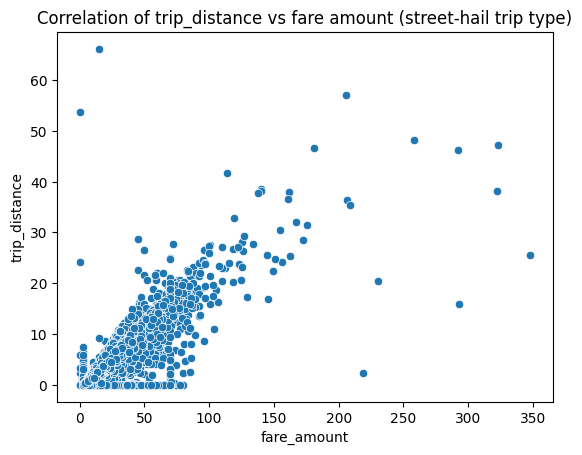

In [47]:
# Melihat hubungan tarif vs jarak trip (trip type street hail)
sns.scatterplot(data = df[df['trip_type']==1], x = 'fare_amount',y = 'trip_distance')
dfd = df[df['trip_type']==1]
plt.title('Correlation of trip_distance vs fare amount (street-hail trip type)')
round(dfd[['fare_amount','trip_distance']].corr('spearman'),2)


,fare_amount,trip_distance
fare_amount,1.00,0.29
trip_distance,0.29,1.00


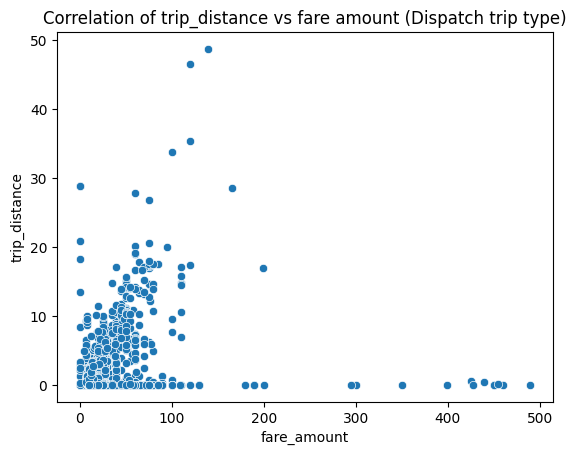

In [48]:
# Melihat hubungan tarif vs jarak trip (trip type Dispatch)
sns.scatterplot(data = df[df['trip_type']==2], x = 'fare_amount',y = 'trip_distance')
dfs = df[df['trip_type']==2]
plt.title('Correlation of trip_distance vs fare amount (Dispatch trip type)')
round(dfs[['fare_amount','trip_distance']].corr('spearman'),2)

Dua grafik diatas menunjukkan scatterplot jarak perjalanan (trip_distance) vs tarif (fare_amount) yang dikenakan dimana grafik 1 hanya mewakili trip type 'street hail' dan grafik 2 hanya mewakili trip type 'dispatch'. Terlihat keduanya memiliki kekuatan korelasi positif yang berbeda. Perhitungan korelasi dengan spearmann grafik 1 adalah 0.85 dan grafik 2 adalah 0.29 (spearmann digunakan sebab distribusi data masing-masing fare_amount dan trip_distance tergolong tidak normal)

Hal ini menandakan adanya perbedaan pola penerapan tarif pada kedua trip type tersebut yaitu pada 'dispatch' yang tidak sesuai jarak (Jarak dekat dapat dikenakan biaya tinggi dan rendah). 

Rekomendasi terkait kedua grafik ini adalah memberikan standar tarif yang sama antar trip type 'dispatch' dan 'street hail'. Atau dapat dilakukan penelusuran penyebab terekamnya data dengan durasi 0 detik yang cenderung berlokasi di daerah 'unknown' (location ID 264). Terdapat kemungkinan daerah-daerah 'unknown' yang belum terstandarisasi penerapan tarifnya.  

#### 2. Taxi trend

In [173]:
# Melihat trend penggunaan taksi
trend = df.groupby('lpep_pickup_hour')['VendorID'].count().reset_index()
trend.rename(columns = {'VendorID':'Number of trips'}, inplace = True)

trend1 = df.groupby('lpep_dropoff_hour')['VendorID'].count().reset_index()
trend1.rename(columns = {'VendorID':'Number of trips'}, inplace = True)


<Axes: xlabel='lpep_pickup_hour', ylabel='Number of trips'>

<Axes: xlabel='lpep_pickup_hour', ylabel='Number of trips'>

Text(0.5, 1.0, 'Pickup and Dropoff trend of taxi in NYC each hour')

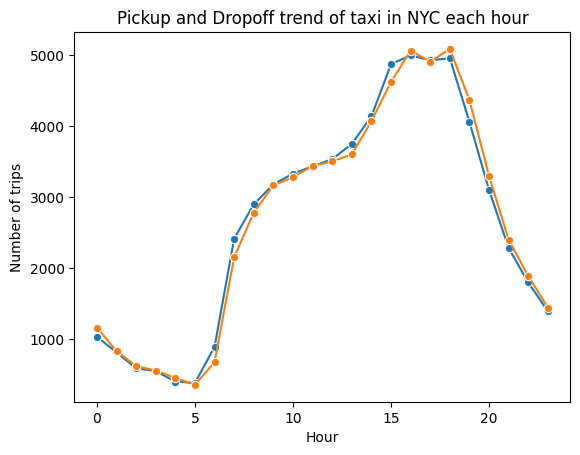

In [203]:
# Trend penggunaan taksi berdasarkan jam pickup vs Jumlah trip
display(sns.lineplot(data = trend, x ='lpep_pickup_hour', y ='Number of trips', marker = 'o'))
display(sns.lineplot(data = trend1, x = 'lpep_dropoff_hour', y = 'Number of trips',marker = 'o'))
plt.xlabel('Hour')
plt.title('Pickup and Dropoff trend of taxi in NYC each hour')

Berikut trend penggunaan taksi berdasarkan jam pickup (garis oranye) dan jam dropoff (garis biru). 
Penggunaan taksi umumnya akan menurun dari jam 00.00 hingga 05.00 dan meningkat menjelang jam 15.00 setelah jam 05.00. 
Trend akan menurun setelah jam 18.00 dan selanjutnya.

Jam pickup dan drop off sangat berhubungan satu dengan yang lain dimana peak (15.00) dan pit (05.00) trend taxi sangat serupa.

Terkait grafik ini, rekomendasi yang dapat dilakukan adalah memperbanyak armada dan driver taksi pada jam 15.00 hingga 18.00 dan menurunkan jumlah perjalanan untuk keduanya pada jam 20.00 hingga jam 05.00.


In [52]:
# Jumlah trip per kategori waktu
timeday = df.groupby('Time of the day')['VendorID'].count().reset_index()
timeday1 = timeday.loc[[2,0,1,3],['Time of the day','VendorID']]
timeday1.rename(columns = {'VendorID':'Total trips'},inplace = True)
timeday1

,Time of the day,Total trips
2,Morning,15256
0,Afternoon,26218
1,Evening,9016
3,Overnight,13209


Text(0.5, 1.0, 'Total trips for each "time" category (morning, afternoon, evening, overnight)')

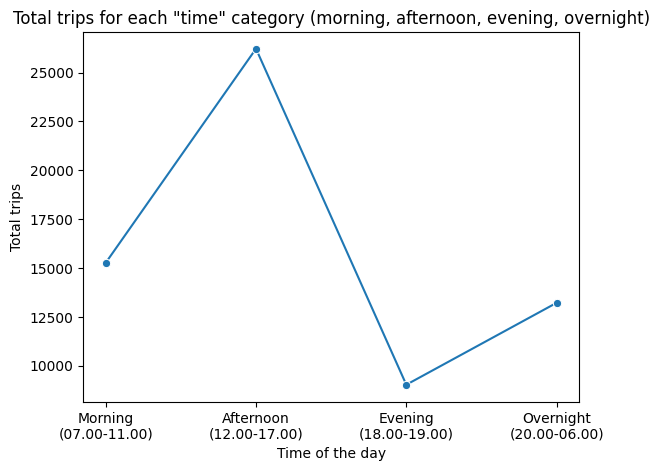

In [205]:
sns.lineplot(data = timeday1, x ='Time of the day', y = 'Total trips', estimator = 'sum', marker = 'o')
plt.xticks([0,1,2,3],['Morning\n(07.00-11.00)','Afternoon\n(12.00-17.00)','Evening\n(18.00-19.00)','Overnight\n(20.00-06.00)'])
plt.title('Total trips for each "time" category (morning, afternoon, evening, overnight)')

Terdapat peningkatan jumlah trip atau perjalanan pada jam 12.00 hingga 17.00 (peak grafik) yang selaras dengan grafik sebelumnya (Pickup and Dropoff trend of taxi in NYC each hour) yaitu peak pada jam 15.00, dan penurunan jumlah trip atau permintaan taksi pada waktu Overnight. 


[Text(0, 0, '7749'),
 Text(0, 0, '9347'),
 Text(0, 0, '10570'),
 Text(0, 0, '9274'),
 Text(0, 0, '9515'),
 Text(0, 0, '9282'),
 Text(0, 0, '7962')]

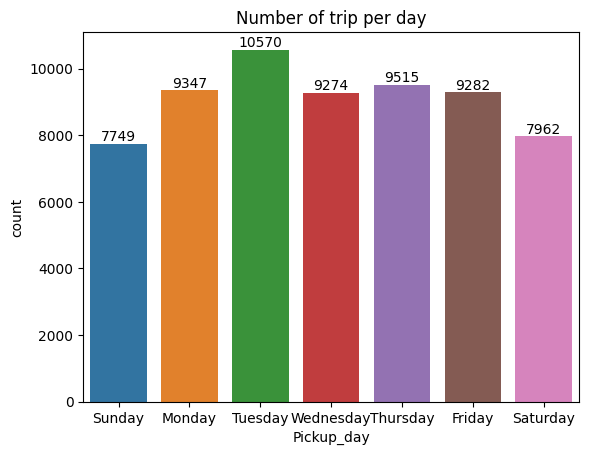

In [206]:
# Jumlah trip per hari
ax = sns.countplot(data =df,x ='Pickup_day')
plt.title('Number of trip per day')
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

Jumlah trip paling banyak terjadi pada hari selasa yaitu 10570, dimana weekdays (senin, selasa, rabu, kamis, jumat) hampir terlihat uniform. Jumlah trip pada hari weekend (sabtu dan minggu) lebih rendah yaitu 7962 dan 7749 secara berurutan.

Text(0.5, 1.0, 'Total Revenue from taxis each day')

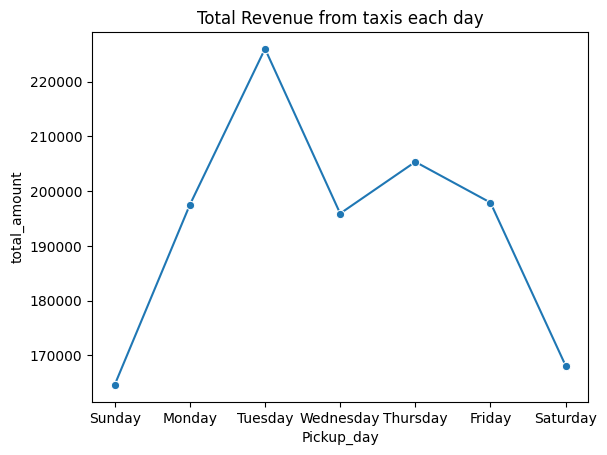

In [209]:
# Penghasilan total per hari
sns.lineplot(data = df, x ='Pickup_day', y = 'total_amount', estimator = 'sum', ci = None, marker = 'o')
plt.title('Total Revenue from taxis each day')

Berdasarkan grafik diatas yaitu jumlah atau sum dari total_amount (revenue taksi) vs hari, puncak penghasilan dari armada-armada ada pada hari selasa. 

Selanjutnya total penghasilan akan menurun pada hari rabu dan kembali meningkat secara perlahan pada hari kamis. Setelah kamis, total penghasilan akan menurun cukup banyak hingga hari minggu. 

Berdasarkan visualisasi ini, rekomendasi yang dapat dilakukan adalah meningkatkan jumlah armada dan pengemudi taksi pada hari selasa serta menurunkan jumlah keduanya pada hari sabtu dan minggu

#### 3. Most Common Number of Passenger per Ride

Text(0.5, 1.0, 'Number of passengers per ride based on passenger_count')

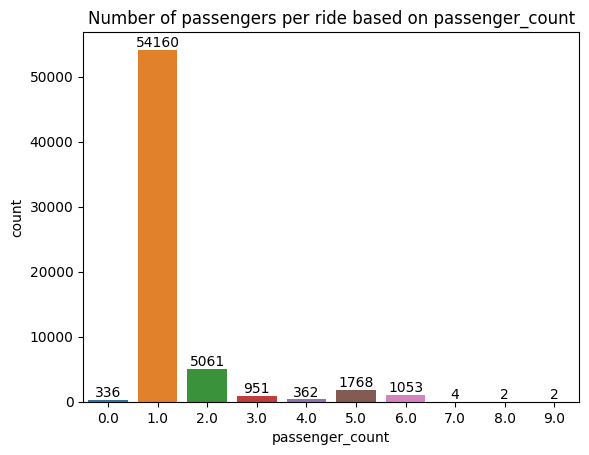

In [56]:
# Berdasarkan passenger_count
ax = sns.countplot(x = df['passenger_count'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
plt.title('Number of passengers per ride based on passenger_count')


Taksi menjadi pilihan bagi penumpang solo dengan jumlah penumpang solo sebanyak 54160. Posisi kedua diikuti oleh penumpang dua orang (5061 perjalanan atau trip), selanjutnya 5 orang (1768 trip), 6 orang (1053 trip), 3 orang (951 trip), dan 4 orang (362 trip). 

Terdapat sebanyak 336 trip yang tidak memiliki penumpang. Hal ini mungkin terjadi karena trip dilakukan untuk pengiriman barang

([<matplotlib.axis.XTick at 0x1914ce1f250>,
 [Text(0, 0, 'Standar rate\n(Code 1)'),
  Text(1, 0, 'JFK\n(Code 2)'),
  Text(2, 0, 'Newark\n(Code 3)'),
  Text(3, 0, 'Nassau\nor\nWestchester\n(Code 4)'),
  Text(4, 0, 'Negotiated\nfare\n(Code 5)')])

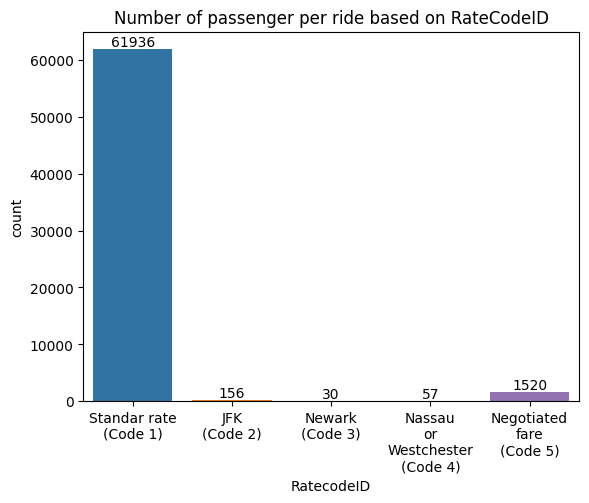

In [57]:
# Berdasarkan RateCodeID
ax = sns.countplot(x = df['RatecodeID'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
plt.title('Number of passenger per ride based on RateCodeID')
plt.xticks([0,1,2,3,4],['Standar rate\n(Code 1)','JFK\n(Code 2)','Newark\n(Code 3)','Nassau\nor\nWestchester\n(Code 4)','Negotiated\nfare\n(Code 5)'])

Pada RatecodeID, seharusnya terdapat data 'Group Ride' dengan code = 6 yang menandakan bahwa trip tersebut memiliki lebih dari satu penumpang dimana tarifnya akan dibagi sesuai jumlah penumpang. Bar plot di atas menunjukkan tidak ada pengguna group ride atau memang belum/tidak tersedia datanya.  

#### 4. Distance wise usage

Text(0.5, 0, 'pickup_hour')

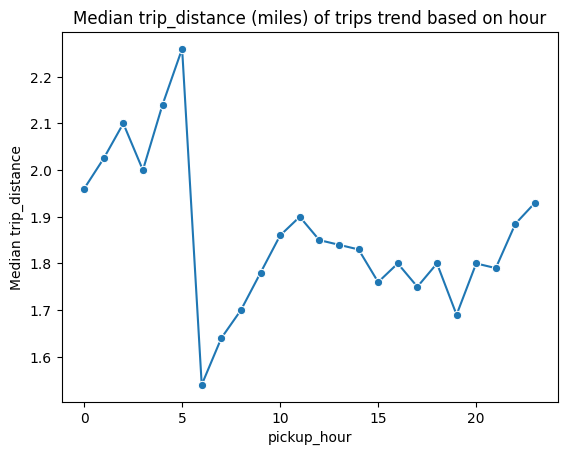

In [198]:
# Trend rata-rata (digambarkan dengan median) trip_distance untuk trip taksi berdasarkan jam pickup vs rata-rata 'total_amount'
sns.lineplot(data = df, x ='lpep_pickup_hour', y ='trip_distance',estimator ='median',ci = None,marker='o')
plt.ylabel('Median trip_distance')
plt.title('Median trip_distance (miles) of trips trend based on hour')
plt.xlabel('pickup_hour')

Grafik di atas menunjukkan median jarak terjauh yang ditempuh ada pada jam 05.00 (termasuk kategori overnight). Median digunakan karena distribusi tidak normal. 
Setelah jam tersebut trend menurun dan mengalami peningkatan kembali tapi tidak terlalu drastis, bahkan cenderung stagnan dari jam 10.00 hingga jam 14.00, dan mengalami penurunan & kenaikan yang konsisten tiap jamnya dari jam 15.00 hingga 20.00. Setelah jam 20.00 trend median jarak yang ditempuh setiap taksi kembali naik. 
Sehingga dapat disimpulkan bahwa terdapat orang-orang yang memilih untuk berpergian jauh di jam 5 pagi.

Text(0.5, 1.0, 'Boxplot of RatecodeID vs trip_distance')

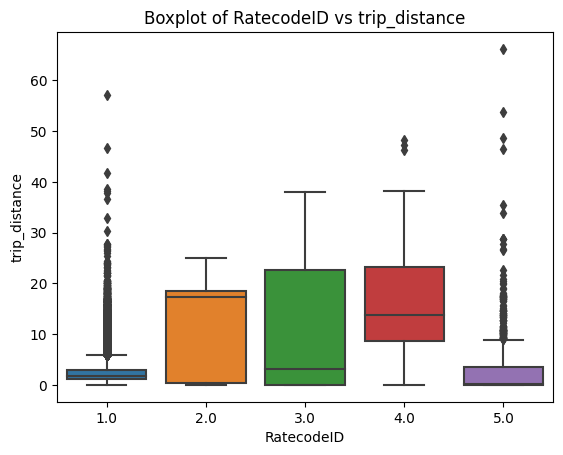

In [183]:
# Melihat trip_distance berdasarkan RatecodeID 
sns.boxplot(data = df, x = 'RatecodeID', y = 'trip_distance')
plt.title('Boxplot of RatecodeID vs trip_distance')

Dengan trip_distance pada RatecodeID 2, 3, dan 4 yang cenderung tidak terdapat outliers, dapat dikatakan penerapan ratecodeID ketiganya sudah sesuai dimana ketiganya merupakan kode untuk perjalanan ke JFK, Newark, dan Nassau secara berurutan. Sudah seharusnya jarak yang ditempuh berada dalam suatu rentang karena dikhususkan ke 3 lokasi ini saja. Berbeda halnya dengan ratecodeID 1 dan 5 yang memiliki banyak outlier karena menggunakan penerapan tarifnya adalah standard rate, yang berlaku untuk berbagai tujuan taksi sehingga variasi jaraknya akan lebih luas. 

'Median of trip_distance = 1.8'

Text(0.5, 1.0, 'Boxplot of each payment_type vs trip_distance')

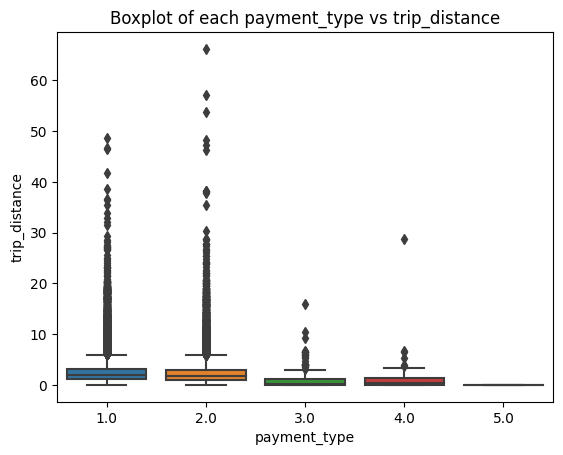

In [178]:
# Melihat hubungan data kategorik (payment_type) dan numerik (trip_distance) 
sns.boxplot(data = df, x = 'payment_type', y = 'trip_distance')
plt.title('Boxplot of each payment_type vs trip_distance')
plt.ylabel()

Jarak dan tipe pembayaran tidak memiliki hubungan yang kuat. Rentang jarak yang ditempuh perjalanan dengan pembayaran cash (payment type 1) maupun credit card (payment type 2) (dua tipe pembayaran yang paling sering dipakai secara keseluruhan) tidak berbeda jauh. Walau secara outlier (trip_distance >50), terdapat beberapa orang yang berpergian jauh dan memilih untuk membayar dengan cash (payment type 2)

#### 5. Tipping point

Text(0.5, 1.0, 'Number of trips with and without tips vs payment_type')

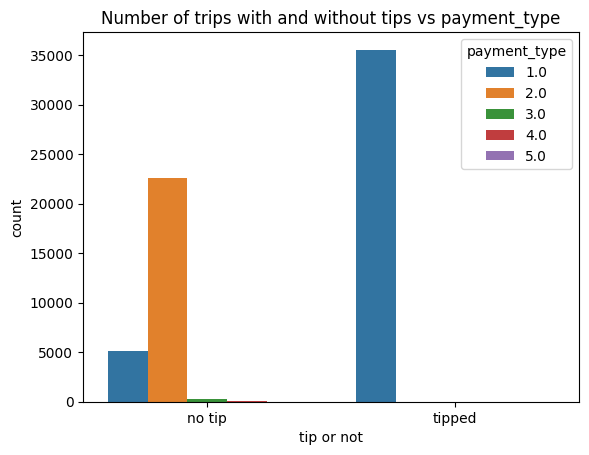

In [187]:
# Melihat hubungan pemberian tip dengan jenis pembayaran
sns.countplot(data = df, x = 'tip or not', hue = 'payment_type')
plt.xticks([0,1],['no tip','tipped'])
plt.title('Number of trips with and without tips vs payment_type')

Terdapat lebih banyak orang yang memberi tip dibanding tidak memberi tip

Pentingnya metode pembayaran dalam menentukan apakah tip akan diberikan atau tidak adalah temuan menarik lainnya. Penumpang yang menggunakan pembayaran dengan kartu kredit (pembayaran 1, bar biru) lebih cenderung memberi tip, sedangkan penumpang yang menggunakan uang tunai (pembayaran 2, bar oranye) lebih sering tidak memberi tip. Hal yang konsisten ini mempengaruhi keputusan penumpang tentang memberikan tip kepada pengemudi.
Dengan kata lain, selain kualitas pelayanan pengemudi, metode pembayaran juga menjadi faktor penting dalam kecenderungan penumpang memberi tip.

Sebagai rekomendasi, ada manfaat dalam memprioritaskan penawaran metode pembayaran dengan kartu kredit sebagai pilihan utama. Namun, bagi penumpang yang lebih memilih uang tunai, disarankan untuk menyediakan opsi pembayaran online seperti QRIS untuk memberikan alternatif yang lebih mudah dan memfasilitasi pemberian tip. Dengan cara ini, kita dapat meningkatkan peluang untuk mendapatkan tip yang lebih besar dan juga memperbaiki pengalaman pelanggan secara keseluruhan.

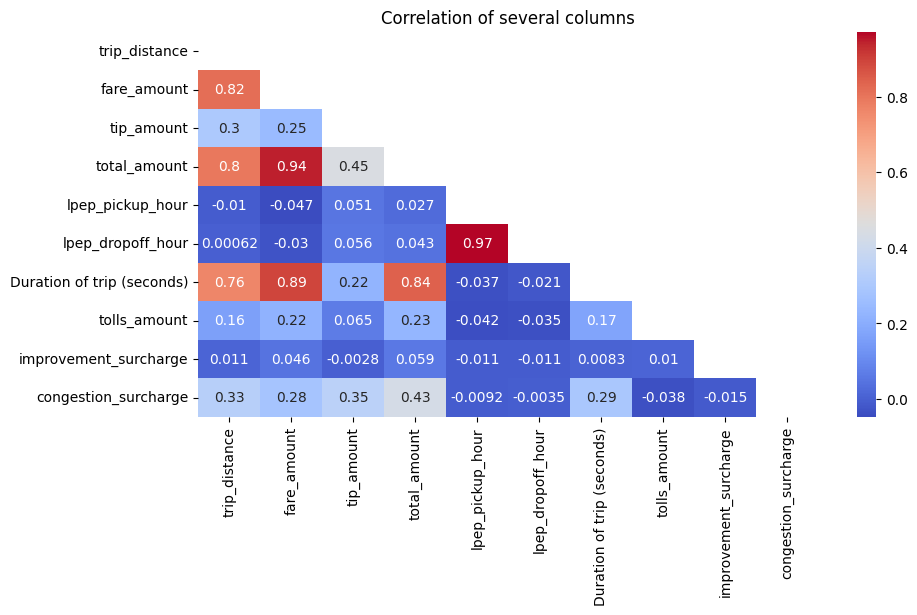

In [62]:
# Melihat heatmap untuk menentukan korelasi dari beberapa kolom 
angka = ['trip_distance','fare_amount','tip_amount','total_amount','lpep_pickup_hour','lpep_dropoff_hour','Duration of trip (seconds)','tolls_amount','improvement_surcharge','congestion_surcharge']
plt.figure(figsize=(10,5))
data_corr = df[angka].corr('spearman')
matrix = np.triu(data_corr)
sns.heatmap(
    data_corr, 
    annot=True, 
    cmap = 'coolwarm', 
mask = matrix)
plt.title('Correlation of several columns')

plt.show()

Dari heatmap di atas, dapat dilihat korelasi yang positif yang kuat antara : (nilai > 0.7)
1. trip_distance vs fare_amount atau total_amount atau Duration of trip
2. fare_amount vs duration of trip atau total_amount
3. total_amount vs duration of trip 
4. lpep_pickup_hour vs lpep_dropoff_hour

Terdapat juga korelasi yang positif tetapi lemah antara: (nilai sekitar 0.3)
1. tip_amount vs duration of trip atau trip_distance atau fare_amount



###  V. Regulation-Oriented

[Text(0, 0, '1582'),
 Text(0, 0, '53036'),
 Text(0, 0, '25'),
 Text(0, 0, '9055'),
 Text(0, 0, '1')]

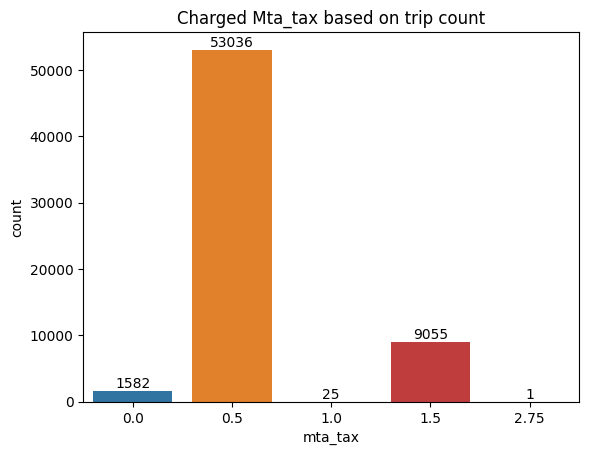

In [63]:
ax =sns.countplot(data = df, x='mta_tax')
plt.title('Charged Mta_tax based on trip count')
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

Biaya pajak MTA-Tax yang paling umum diterapkan adalah sebesar \$0.5, yang sesuai dengan regulasi yang berlaku. Namun, perlu dicatat bahwa terdapat beberapa perjalanan yang mengenakan biaya pajak ini di atas angka \$0.5, seperti \$1.0, \$1.5, dan bahkan \$2.75. Data menunjukkan bahwa cukup banyak perjalanan (9055) mengenakan biaya pajak MTA sebesar \$1.5, tiga kali lipat dari jumlah yang seharusnya. Hal ini menunjukkan adanya ketidaksesuaian dalam penerapan biaya pajak MTA yang perlu diperhatikan lebih lanjut.

In [64]:
# Hubungan antara between mta_tax dan vendorID
dfmta = pd.crosstab(df['VendorID'],df['mta_tax'])
dfmta.T

VendorID,1,2
mta_tax,,
0.00,76,1506
0.50,48,52988
1.00,25,0
1.50,9055,0
2.75,1,0


Biaya MTA-Tax yang dikenakan saat data disediakan oleh VendorID 1 atau CMT selalu memiliki variasi yang cukup besar, berkisar dari \$0.00 hingga \$2.75.
Biaya MTA-Tax sebesar \$1.5 adalah yang paling sering dikenakan pada perjalanan, dengan total 9055 perjalanan menggunakan tarif ini.
Di sisi lain, jika dibandingkan dengan VendorID 2 atau Verifone, mereka selalu mengenakan biaya MTA-Tax yang konsisten, yaitu antara \$0.00 atau \$0.5 (sesuai dengan regulasi).

([<matplotlib.axis.XTick at 0x1914c86d0d0>,
 [Text(0, 0, 'CMT'), Text(1, 0, 'Verifone')])

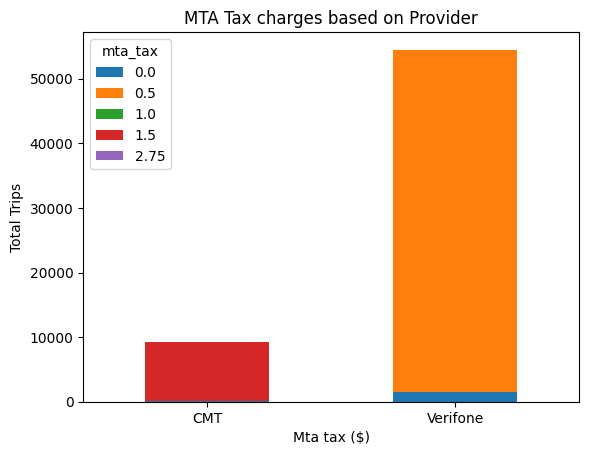

In [65]:
# Hubungan antara between mta_tax dan vendorID 
ax = dfmta.plot(kind = 'bar', stacked = True) 
plt.title('MTA Tax charges based on Provider')
plt.xlabel('Mta tax ($)')
plt.ylabel('Total Trips') 
plt.xticks([0,1],['CMT','Verifone'], rotation = 0)


Jumlah perjalanan yang melampaui regulasi MTA-Tax (\$1.5, ditunjukkan oleh bar merah) tercatat pada perjalanan yang diproses oleh provider CMT (VendorID 1). Sementara itu, berbeda halnya dengan provider Verifone yang membatasi MTA-Tax hingga 
\$0.5, yang sesuai dengan regulasi yang berlaku.

In [66]:
# Hubungan antara between mta_tax dan vendorID (hanya tipe trip 2 atau 'dispatch')
dfdis = df[df['trip_type']==2]
dfmta = pd.crosstab(dfdis['VendorID'],dfdis['mta_tax'])
dfmta.T

VendorID,1,2
mta_tax,,
0.0,57,1328
0.5,0,4
1.5,4,0


Terdapat sejumlah besar perjalanan yang tidak mengenakan MTA-Tax (dengan MTA-Tax sebesar \$0.00), yaitu sebanyak 57 perjalanan untuk masing-masing provider. Sementara itu, biaya MTA-Tax yang seharusnya adalah \$0.5 hanya dikenakan pada 4 perjalanan oleh provider 2, dan sebanyak 4 perjalanan lainnya dikenakan MTA-Tax sebesar \$1.5 oleh provider 1.

([<matplotlib.axis.XTick at 0x19157c83e90>,
 [Text(0, 0, 'CMT'), Text(1, 0, 'Verifone')])

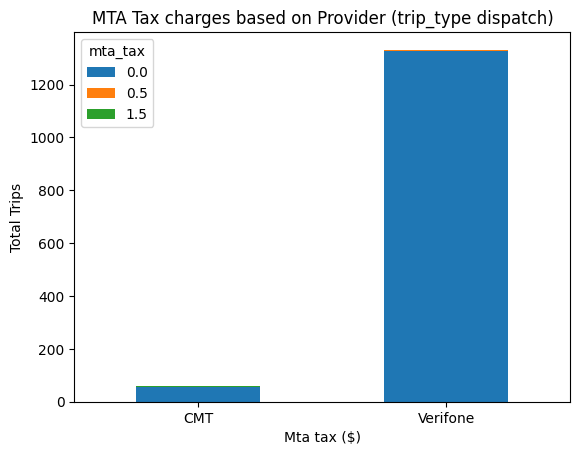

In [188]:
# Hubungan antara between mta_tax dan vendorID (hanya tipe trip 2 atau 'dispatch')
ax = dfmta.plot(kind = 'bar', stacked = True) 
plt.title('MTA Tax charges based on Provider (trip_type dispatch)')
plt.xlabel('Mta tax ($)')
plt.ylabel('Total Trips') 
plt.xticks([0,1],['CMT','Verifone'], rotation = 0)

Ketika hanya mempertimbangkan data dengan tipe perjalanan "dispatch," terlihat bahwa kedua provider umumnya tidak mengenakan biaya MTA-Tax (\$0.00), yang berarti tidak sesuai dengan regulasi yang berlaku.

[Text(0, 0, '186'), Text(0, 0, '3880'), Text(0, 0, '59633')]

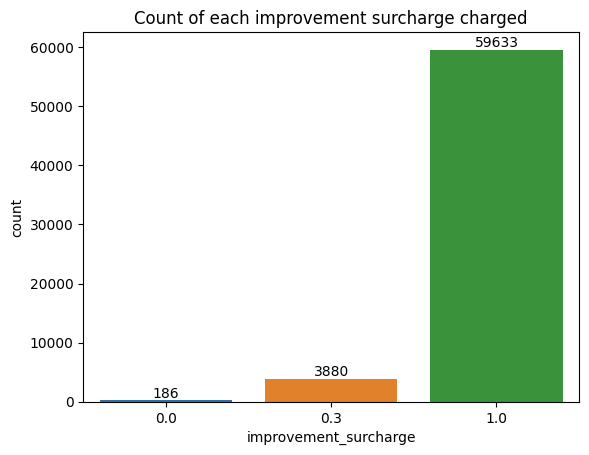

In [68]:
# Melihat biaya improvement yang dikenakan
ax =sns.countplot(data = df, x = 'improvement_surcharge')
plt.title('Count of each improvement surcharge charged')
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')


Biaya improvement_surcharge yang paling sering dikenakan adalah \$ 1.00 telah sesuai dengan aturan yang ada sekarang (per 2022) dimana sebelumnya adalah \$ 0.3. 

In [69]:
df[df['improvement_surcharge']==0.3]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Dropoff_date,Pickup_day,Dropoff_day,lpep_pickup_hour,lpep_dropoff_hour,lpep_pickup_time,lpep_dropoff_time,Duration of trip (seconds),Time of the day,tip or not
32,2,2023-01-01 00:40:58,2023-01-01 01:04:32,N,5.0,66,164,4.0,6.78,60.0,...,01,Sunday,Sunday,0,1,00:40:58,01:04:32,1414.0,Overnight,1
41,2,2023-01-01 00:08:05,2023-01-01 00:13:26,N,1.0,41,75,6.0,1.05,5.5,...,01,Sunday,Sunday,0,0,00:08:05,00:13:26,321.0,Overnight,1
43,2,2023-01-01 00:16:10,2023-01-01 00:54:55,N,5.0,66,48,3.0,6.19,75.0,...,01,Sunday,Sunday,0,0,00:16:10,00:54:55,2325.0,Overnight,0
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.00,3.0,...,01,Sunday,Sunday,1,1,01:52:58,01:53:00,2.0,Overnight,1
147,2,2023-01-01 02:01:43,2023-01-01 02:03:43,N,5.0,179,7,1.0,0.32,25.0,...,01,Sunday,Sunday,2,2,02:01:43,02:03:43,120.0,Overnight,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63851,2,2023-01-31 23:06:51,2023-01-31 23:17:06,N,1.0,166,74,1.0,1.88,9.0,...,31,Tuesday,Tuesday,23,23,23:06:51,23:17:06,615.0,Overnight,1
63852,2,2023-01-31 23:42:20,2023-01-31 23:55:05,N,1.0,166,74,1.0,2.20,10.5,...,31,Tuesday,Tuesday,23,23,23:42:20,23:55:05,765.0,Overnight,0
63864,2,2023-01-31 23:05:02,2023-01-31 23:11:31,N,1.0,75,239,1.0,1.48,9.3,...,31,Tuesday,Tuesday,23,23,23:05:02,23:11:31,389.0,Overnight,1
63865,2,2023-01-31 23:34:50,2023-01-31 23:47:23,N,1.0,75,48,1.0,3.79,17.7,...,31,Tuesday,Tuesday,23,23,23:34:50,23:47:23,753.0,Overnight,0


Text(0.5, 1.0, 'Charged extras each time of the day (trip_type = street hail)')

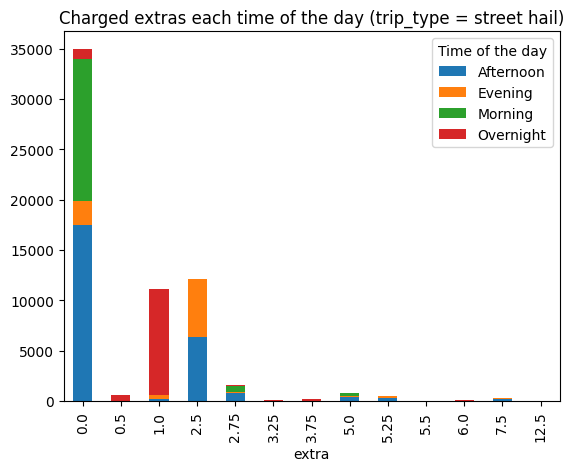

In [70]:
# Melihat biaya extra yang dikenakan untuk tipe trip 'street hail'
df1 = df[df['trip_type']==1]
dfex = pd.crosstab(df1['extra'],df1['Time of the day'])
dfex.plot(kind = 'bar', stacked = 'True')
plt.title('Charged extras each time of the day (trip_type = street hail)')

Biaya tambahan yang dapat dikenakan adalah sebesar \$1.00 (untuk perjalanan di waktu overnight) atau \$2.50 (untuk perjalanan pada jam sibuk, rush hour), dengan total maksimum mencapai \$3.50.

- Biaya tambahan sebesar \$1.00 dikenakan jika perjalanan terjadi pada waktu overnight, dan ini sesuai dengan regulasi yang berlaku.
- Biaya tambahan sebesar \$2.50 dikenakan jika perjalanan terjadi pada waktu evening dan afternoon, dan ini juga telah sesuai dengan regulasi yang berlaku.

Namun, terlihat bahwa: 
- Terdapat beberapa kasus di mana biaya tambahan melebihi \$2.50, berkisar dari \$2.75 hingga \$12.5, yang melewati batasan yang diatur oleh regulasi.

In [71]:
# Melihat apakah biaya melebihi $ 2.5 (contohnya $2.75) adalah congestion surcharge (karena biayanya sama yaitu $ 2.75)
df[df['congestion_surcharge']==2.75]['extra'].value_counts()


extra
0.00    8991
2.50    3170
1.00    2306
2.75    1573
5.25     496
3.75     220
0.50      63
3.25      52
Name: count, dtype: int64

Dapat diamati bahwa ketika biaya congestion_surcharge sebesar \$2.75, biaya tambahan (extra) memiliki variasi yang cukup besar. Hal ini mengindikasikan bahwa biaya extra tidak termasuk dalam biaya congestion_surcharge.

Intinya, biaya tambahan yang melebihi $3.50 tidak sesuai dengan regulasi yang berlaku.

Text(0.5, 1.0, 'Each congestion_surcharge charged')

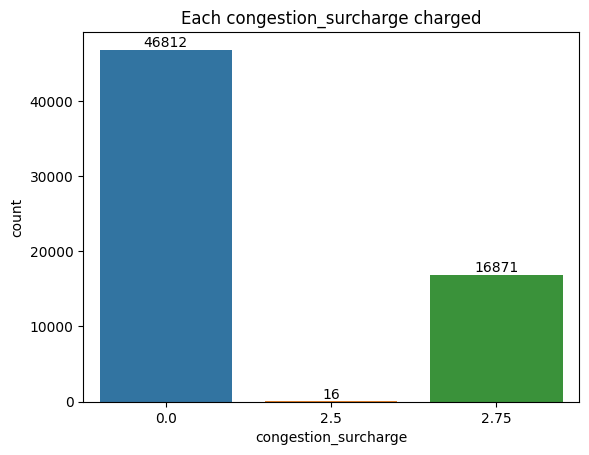

In [189]:
# Melihat jumlah setiap congestion_surcharge
ax =sns.countplot(data = df, x = 'congestion_surcharge')
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
plt.title('Each congestion_surcharge charged')

Congestion_surcharge yang diberikan sudah sesuai karena tidak melebihi \$ 2.75

### VI. System-Oriented

Text(0.5, 1.0, 'Number of data with each VendorID')

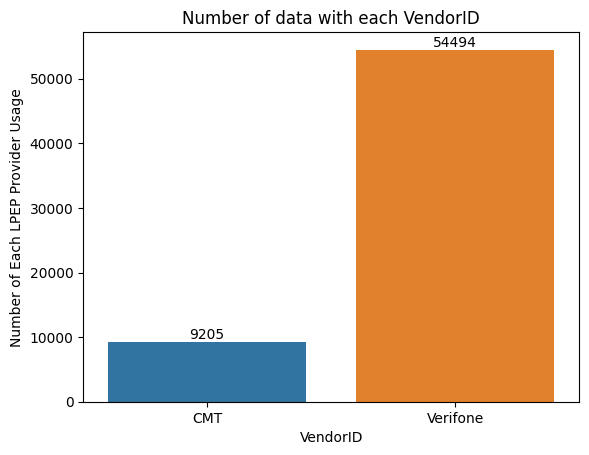

In [73]:
# Vendor ID yang lebih banyak
ax =sns.countplot(x=df['VendorID'])
plt.ylabel('Number of Each LPEP Provider Usage')
plt.xticks([0,1],['CMT','Verifone'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
plt.title('Number of data with each VendorID')

Vendor yang lebih sering digunakan adalah Verifone.Inc dengan jumlah data 54494

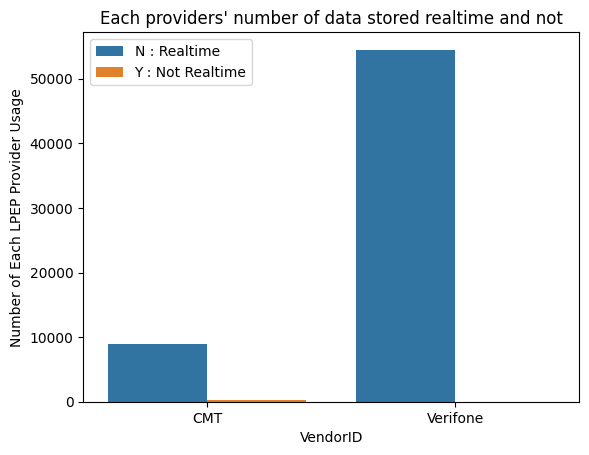

In [74]:
# Melihat jumlah trip per vendor ID yang difilter berdasarkan store_fwd_flag
sns.countplot(x=df['VendorID'], hue = df['store_and_fwd_flag'])
plt.ylabel('Number of Each LPEP Provider Usage')
plt.xticks([0,1],['CMT','Verifone'])
plt.title("Each providers' number of data stored realtime and not")
plt.legend(['N : Realtime','Y : Not Realtime'])

Kedua provider sama-sama memiliki lebih banyak realtime data (N) dibanding bukan realtime (Y). Akan tetapi provider CMT memiliki ratio data tidak realtime(N) yang lebih banyak dibanding provider Verifone padahal Verifone menanggulangi lebih banyak data. 

[Text(0, 0, '62306'), Text(0, 0, '1393')]

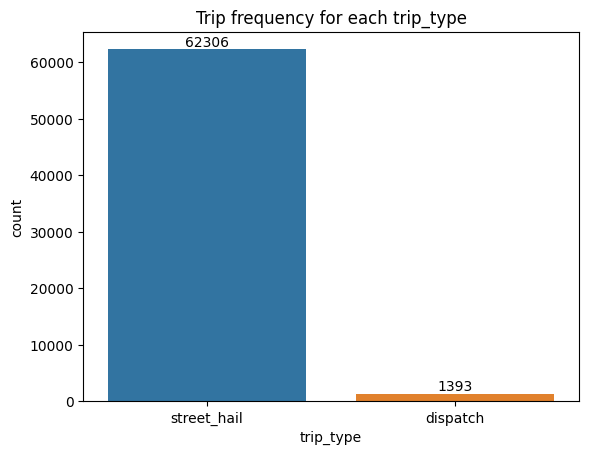

In [75]:
# Frekuensi dari dispatch dan street hail trip type
ax =sns.countplot(x = df['trip_type'])
plt.title('Trip frequency for each trip_type')
plt.xticks([0.0,1.0],labels=['street_hail','dispatch'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

Jenis trip yang lebih sering terjadi adalah street_hail (yaitu ketika penumpang langsung memesan taksi di tempat) dengan jumlah 62306 dibanding dispatch (yaitu penumpang yang memesan taksi via aplikasi atau layanan telepon) sebanyak 1393 saja. 

## **IV. Conclusion & Recommendation**

**Pelanggan:**

1. **Tarif dan Tip**
   - Hanya 0.1% penumpang yang tidak puas dengan tarif dan mengajukan sengketa.
   - Kartu kredit merupakan metode pembayaran yang paling umum dipilih oleh penumpang, dengan pembayaran tunai menjadi peringkat kedua.
   - Penggunaan kartu kredit meningkatkan kecenderungan penumpang untuk memberi tip.
   - Tarif tetap (\$70) untuk perjalanan dari/ke Bandara JFK umumnya telah sesuai, kecuali pada 3 perjalanan di mana tarifnya tidak cocok (\$52).
   - Standar tarif yang dikenakan pada perjalanan tipe "street_hail" dan "dispatch" tidak konsisten, dan ditentukan oleh faktor korelasi.

2. **Trend Penggunaan Taksi**
   - Puncak penggunaan taksi terjadi pada rentang waktu 15.00-17.00, sementara pit (puncak rendah) terjadi pada jam 05.00.
   - Jika kita membagi waktu berdasarkan kategori, puncak penggunaan taksi terjadi di sore hari (12.00-17.00), dengan pit pada waktu malam (20.00-06.00).
   - Permintaan taksi cukup konsisten selama hari kerja (Senin hingga Jumat), dengan puncaknya pada hari Selasa. Pada akhir pekan, permintaan penumpang lebih rendah.
   - Meskipun perbedaan jumlah perjalanan tidak signifikan antara hari kerja, pendapatan armada pada hari Selasa jauh lebih tinggi dibandingkan hari lainnya, sementara pendapatan pada akhir pekan jauh lebih rendah dibandingkan hari kerja.

3. **Jumlah Penumpang**
   - Sebagian besar perjalanan hanya memiliki satu penumpang. Perjalanan dengan lebih dari satu penumpang cukup jarang terjadi. Juga, terdapat perjalanan dengan jumlah penumpang 0, yang kemungkinan menunjukkan pengiriman barang.
   - Tidak ada data tentang RatecodeID 6, yang mengacu pada 'group ride'. Diperlukan lebih banyak data atau investigasi lanjutan untuk memahami penggunaan 'group ride' atau mengapa data untuk kategori ini sangat terbatas.

4. **Jarak**
   - Perjalanan dengan jarak yang cukup jauh biasanya terjadi pada jam 05.00, namun jumlahnya tidak signifikan dan masuk dalam kategori outlier (di atas Q3 + 1.5x IQR), artinya perjalanan jauh ini bukanlah hal yang umum terjadi.


**Regulasi:**

1. **MTA-Tax**
   - Terdapat kecenderungan bahwa biaya MTA-Tax yang disediakan oleh Vendor 1 atau CMT sering kali tidak sesuai dengan regulasi yang telah ditetapkan (melebihi \$0.5), sedangkan Verifone cenderung mematuhi regulasi tersebut.
   - MTA-Tax cenderung tidak dikenakan pada perjalanan tipe 2 atau dispatch.

2. **Improvement Surcharge**
   - Mayoritas biaya improvement surcharge yang dikenakan sudah sesuai dengan regulasi saat ini, yaitu \$1.00 (per 2022), yang sebelumnya sebesar $0.30.

3. **Extra**
   - Biaya tambahan sebesar \$1.00 (overnight charge) yang dikenakan sudah sesuai dengan regulasi, terutama karena mayoritas dikenakan pada kategori waktu overnight.
   - Biaya tambahan sebesar \$2.50 (rush hour charge) yang dikenakan juga sudah sesuai dengan regulasi, terutama karena mayoritas dikenakan pada kategori waktu afternoon (12.00-17.00) dan evening (18.00-19.00) sesuai dengan jam sibuk yang ditetapkan oleh TLC.
   - Namun, terdapat beberapa biaya tambahan yang tidak sesuai dengan ketentuan, dengan rentang biaya bervariasi dari \$2.75 hingga \$12.50.

4. **Congestion Surcharge**
   - Biaya congestion surcharge sudah sesuai dengan regulasi, yaitu \$2.75 untuk taksi hijau (green taxi) dan \$2.50 untuk taksi kuning (yellow taxi).




**Vendor:**

1. **Penggunaan Provider:** Mayoritas penumpang cenderung menggunakan layanan dari Verifone sebagai provider utama.

2. **Penyediaan Data Real-time:** Kedua provider utama cenderung menyediakan data secara real-time daripada menyimpannya terlebih dahulu dalam memori kendaraan. Namun, perbandingan menunjukkan bahwa CMT memiliki rasio penyimpanan data secara non real-time yang lebih tinggi dibandingkan dengan Verifone.

3. **Pemesanan Trip:** Pemesanan perjalanan dengan taksi melalui layanan taxi dispatch (1393 perjalanan), yang mencakup pemesanan online atau melalui layanan telepon, jauh lebih sedikit dibandingkan dengan pemesanan langsung di jalan (62306 perjalanan) yang lebih umum dikenal sebagai street-hail.



#### **Rekomendasi:**

Secara umum, layanan taksi di NYC masih belum cukup baik dalam hal penerapan regulasi. Maka beberapa langkah yang dapat dilakukan untuk meningkatkan layanan adalah:

1. **Komitmen dengan Provider CMT:** Perlu dilakukan diskusi dengan provider CMT terkait pelanggaran regulasi, khususnya terkait pajak seperti MTA-Tax yang sering kali melampaui batasan (lebih dari \$0.5). Kerjasama yang lebih baik dengan provider ini dapat membantu memastikan ketaatan terhadap aturan.

2. **Prioritaskan Penggunaan Provider Verifone:** Menimbang untuk lebih banyak menggunakan layanan dari provider Verifone, yang terbukti konsisten dalam menyediakan data real-time dan menerapkan biaya seperti MTA-Tax sesuai dengan regulasi yang berlaku.

3. **Optimalkan Armada:** Meningkatkan jumlah armada pada hari Selasa dan selama jam-jam rush hour (15.00-17.00) serta mengurangi jumlah armada pada akhir pekan dan pada jam 05.00. Hal ini akan membantu menyesuaikan penawaran dengan permintaan yang lebih tinggi.

4. **Promosikan Group-Ride:** Jika belum ada penggunaan yang signifikan untuk tipe perjalanan 'group-ride', pertimbangkan untuk menyediakan data atau melakukan kampanye pemasaran yang menjelaskan manfaatnya, seperti tarif yang lebih terjangkau, untuk meningkatkan adopsi layanan ini.

5. **Regulasi Tipe Trip 'Dispatch':** Pertimbangkan untuk lebih merinci regulasi terkait tipe perjalanan 'dispatch', di mana MTA-Tax sering kali tidak dikenakan. Upaya ini dapat memastikan konsistensi dalam penerapan tarif dan pajak untuk semua jenis perjalanan.

6. **Batas Biaya Tambahan (Extra):** Melakukan pengaturan batas atas biaya tambahan (extra) hingga tidak melebihi regulasi yang berlaku, misalnya, memastikan bahwa biaya tambahan tidak dapat melebihi \$3.50 dalam sistem. Hal ini akan menjaga keterjangkauan bagi penumpang.


**Tarif dan Tip:**

7. **Peningkatan Edukasi Penumpang:** Sosialisasikan kepada penumpang mengenai pentingnya memberikan tip yang adil kepada pengemudi sebagai penghargaan atas pelayanan yang baik. Peningkatan pemahaman ini dapat mendorong lebih banyak penumpang untuk memberi tip secara sukarela.

8. **Penerapan Tarif Dinamis:** Pertimbangkan penggunaan tarif dinamis yang dapat menyesuaikan tarif berdasarkan permintaan dan waktu. Hal ini dapat meningkatkan pendapatan pengemudi dan memberikan insentif bagi mereka untuk bekerja pada jam-jam sibuk atau dalam kondisi cuaca buruk.

**Regulasi:**

9. **Transparansi Tarif:** Memastikan transparansi tarif kepada penumpang. Pastikan bahwa penumpang memiliki akses yang mudah untuk memahami struktur tarif dan potensi biaya tambahan sebelum mereka memulai perjalanan.

10. **Pemantauan Secara Berkala:** Lakukan pemantauan yang rutin dan audit terhadap provider dan pengemudi untuk memastikan ketaatan terhadap regulasi. Ini dapat mencakup inspeksi kendaraan, pembayaran pajak, dan kepatuhan terhadap aturan perusahaan.

**Vendor:**

11. **Diversifikasi Vendor:** Pertimbangkan untuk bermitra dengan berbagai vendor dalam industri ini untuk meningkatkan pilihan layanan yang dapat diberikan kepada penumpang. Diversifikasi vendor juga dapat mengurangi risiko ketergantungan pada satu penyedia.

12. **Peningkatan Kualitas Layanan:** Berfokus pada meningkatkan kualitas layanan dari semua vendor yang digunakan. Ini mencakup pelatihan pengemudi dalam keterampilan interpersonal, kenyamanan kendaraan, dan kebersihan.

13. **Inovasi Teknologi:** Terus terapkan teknologi terbaru dalam layanan taksi, termasuk aplikasi seluler yang lebih baik, pemrosesan pembayaran yang lebih efisien, dan pemberian ulasan pelanggan secara real-time untuk memantau kualitas layanan.

14. **Feedback Pelanggan:** Mendorong penumpang untuk memberikan umpan balik secara aktif tentang pengalaman mereka, baik positif maupun negatif. Ini dapat membantu dalam perbaikan yang berkelanjutan dan pengembangan layanan yang lebih baik.

Semua rekomendasi ini dapat membantu meningkatkan pengalaman penumpang, kepatuhan terhadap regulasi, dan kesuksesan bisnis dalam industri taksi di NYC.
